In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from tensornetwork import tensornetwork
from experiments.tree_plotter import nxwrapper

## MPS

In [31]:
mps = tensornetwork.TensorNetwork()
mps_nodes = [mps.add_node(np.random.random([2, 5]), name="W0")]
for i in range(1, 9):
  mps_nodes.append(mps.add_node(np.random.random([5, 2, 5]), name="W{}".format(i)))
  mps.connect(mps_nodes[i][0], mps_nodes[i - 1][-1])
mps_nodes.append(mps.add_node(np.random.random([5, 2]), name="W{}".format(i)))
mps.connect(mps_nodes[-1][0], mps_nodes[-2][-1])

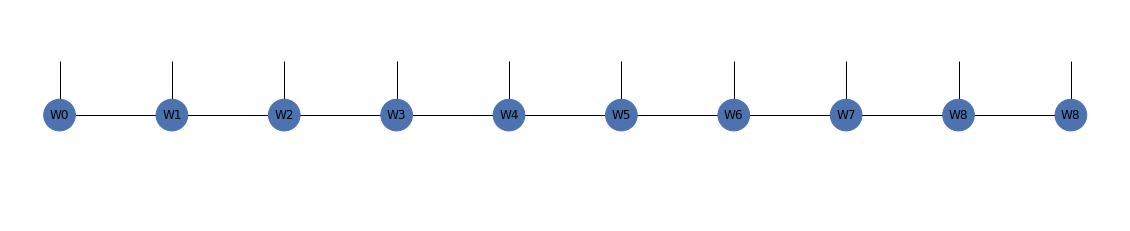

In [32]:
plt.figure(figsize=(20, 4))
nxwrapper.draw_tree(mps_nodes, plt.subplot(111), colormap=seaborn.color_palette("deep"),
                    options={"dangling_size": 0.04})

## MPS and MPO

In [47]:
mps = tensornetwork.TensorNetwork()
mps_nodes = [mps.add_node(np.random.random([2, 5]), name="S0")]
mpo_nodes = [mps.add_node(np.random.random([2, 2, 5]), name="Op0")]
mps.connect(mpo_nodes[0][0], mps_nodes[0][0])
for i in range(1, 9):
  mps_nodes.append(mps.add_node(np.random.random([5, 2, 5]), name="S{}".format(i)))
  mpo_nodes.append(mps.add_node(np.random.random([5, 2, 2, 5]), name="Op{}".format(i)))
  mps.connect(mps_nodes[i][0], mps_nodes[i - 1][-1])
  mps.connect(mpo_nodes[i][0], mpo_nodes[i - 1][-1])
  mps.connect(mpo_nodes[i][1], mps_nodes[i][1])
mps_nodes.append(mps.add_node(np.random.random([5, 2]), name="S{}".format(i)))
mpo_nodes.append(mps.add_node(np.random.random([5, 2, 2]), name="Op{}".format(i)))
mps.connect(mps_nodes[-1][0], mps_nodes[-2][-1])
mps.connect(mpo_nodes[-1][0], mpo_nodes[-2][-1])
mps.connect(mpo_nodes[-1][1], mps_nodes[-1][1])

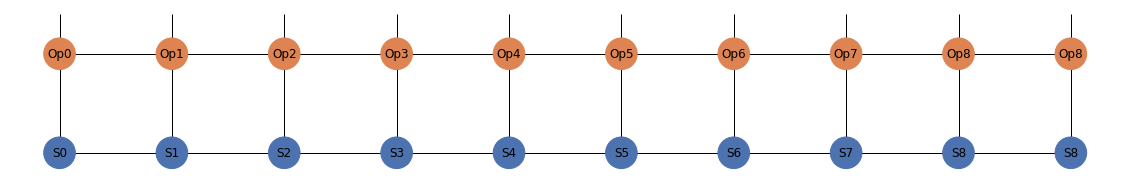

In [48]:
plt.figure(figsize=(20, 3))
nxwrapper.draw_tree(mps_nodes, plt.subplot(111), colormap=seaborn.color_palette("deep"),
                    options={"dangling_size": 0.4, "top_to_bottom": False})

## Binary Tree

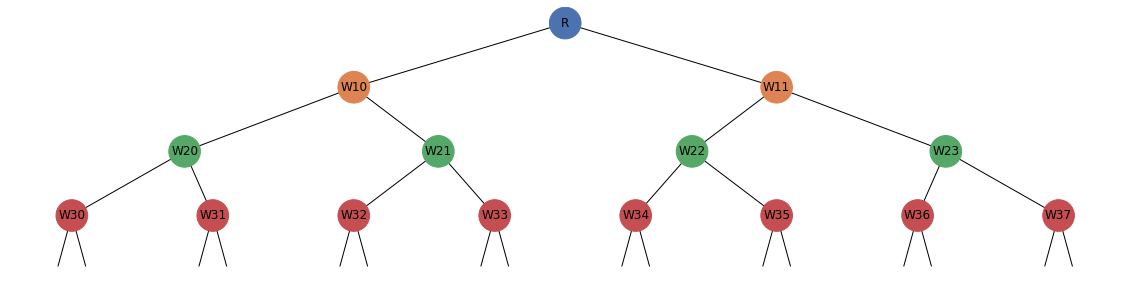

In [63]:
tree = tensornetwork.TensorNetwork()
tree_levels = []
tree_levels.append([tree.add_node(np.eye(4), name="R")])
tree_levels.append([tree.add_node(np.random.random([4, 4, 4]), name="W1{}".format(i)) for i in range(2)])
tree.connect(tree_levels[0][0][0], tree_levels[1][0][0])
tree.connect(tree_levels[0][0][1], tree_levels[1][1][0])

tree_levels.append([tree.add_node(np.random.random([4, 4, 4]), name="W2{}".format(i)) for i in range(4)])
tree.connect(tree_levels[1][0][1], tree_levels[2][0][0])
tree.connect(tree_levels[1][0][2], tree_levels[2][1][0])
tree.connect(tree_levels[1][1][1], tree_levels[2][2][0])
tree.connect(tree_levels[1][1][2], tree_levels[2][3][0])

tree_levels.append([tree.add_node(np.random.random([4, 4, 4]), name="W3{}".format(i)) for i in range(8)])
tree.connect(tree_levels[2][0][1], tree_levels[3][0][0])
tree.connect(tree_levels[2][0][2], tree_levels[3][1][0])
tree.connect(tree_levels[2][1][1], tree_levels[3][2][0])
tree.connect(tree_levels[2][1][2], tree_levels[3][3][0])
tree.connect(tree_levels[2][2][1], tree_levels[3][4][0])
tree.connect(tree_levels[2][2][2], tree_levels[3][5][0])
tree.connect(tree_levels[2][3][1], tree_levels[3][6][0])
tree.connect(tree_levels[2][3][2], tree_levels[3][7][0])

plt.figure(figsize=(20, 5))
nxwrapper.draw_tree(tree_levels[0][0], plt.subplot(111), colormap=seaborn.color_palette("deep"))

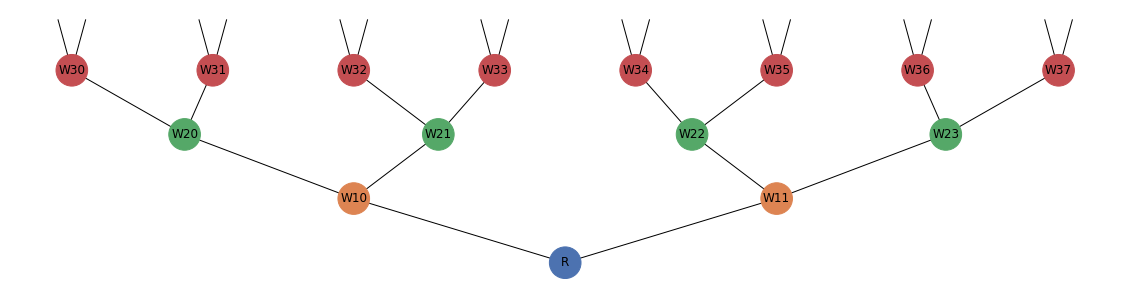

In [64]:
plt.figure(figsize=(20, 5))
nxwrapper.draw_tree(tree_levels[0][0], plt.subplot(111), colormap=seaborn.color_palette("deep"),
                    options={"top_to_bottom": False})

Add in-level edges (not fully-supported - only neighbors)

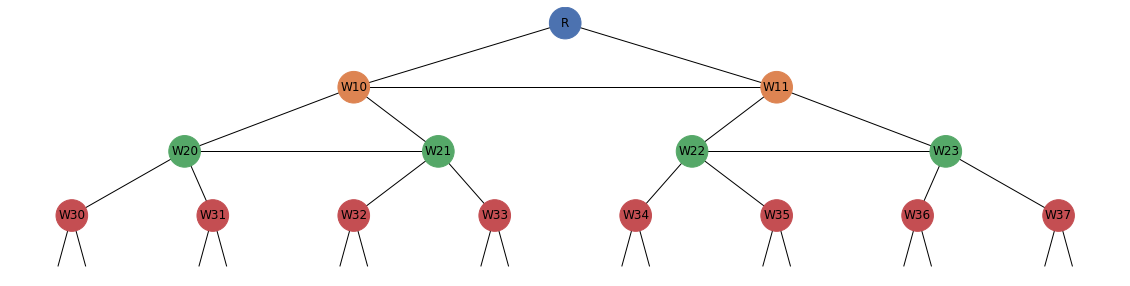

In [67]:
tree = tensornetwork.TensorNetwork()
tree_levels = []
tree_levels.append([tree.add_node(np.eye(4), name="R")])
tree_levels.append([tree.add_node(np.random.random([4, 4, 4, 2]), name="W1{}".format(i)) for i in range(2)])
tree.connect(tree_levels[0][0][0], tree_levels[1][0][0])
tree.connect(tree_levels[0][0][1], tree_levels[1][1][0])
tree.connect(tree_levels[1][0][3], tree_levels[1][1][3])

tree_levels.append([tree.add_node(np.random.random([4, 4, 4, 3]), name="W2{}".format(i)) for i in range(4)])
tree.connect(tree_levels[1][0][1], tree_levels[2][0][0])
tree.connect(tree_levels[1][0][2], tree_levels[2][1][0])
tree.connect(tree_levels[1][1][1], tree_levels[2][2][0])
tree.connect(tree_levels[1][1][2], tree_levels[2][3][0])
tree.connect(tree_levels[2][0][3], tree_levels[2][1][3])
tree.connect(tree_levels[2][2][3], tree_levels[2][3][3])

tree_levels.append([tree.add_node(np.random.random([4, 4, 4]), name="W3{}".format(i)) for i in range(8)])
tree.connect(tree_levels[2][0][1], tree_levels[3][0][0])
tree.connect(tree_levels[2][0][2], tree_levels[3][1][0])
tree.connect(tree_levels[2][1][1], tree_levels[3][2][0])
tree.connect(tree_levels[2][1][2], tree_levels[3][3][0])
tree.connect(tree_levels[2][2][1], tree_levels[3][4][0])
tree.connect(tree_levels[2][2][2], tree_levels[3][5][0])
tree.connect(tree_levels[2][3][1], tree_levels[3][6][0])
tree.connect(tree_levels[2][3][2], tree_levels[3][7][0])

plt.figure(figsize=(20, 5))
nxwrapper.draw_tree(tree_levels[0][0], plt.subplot(111), colormap=seaborn.color_palette("deep"))

## Another tree

Note that in this case we have multiple edges between the same nodes  (in levels 2 and 3) and they are not displayed properly!

In [16]:
tree = tensornetwork.TensorNetwork()
tree_levels = []
tree_levels.append([tree.add_node(np.random.random([4, 4, 4]), name="R")])
tree_levels.append([tree.add_node(np.random.random([4, 4, 4]), name="W1{}".format(i)) for i in range(3)])
tree.connect(tree_levels[0][0][0], tree_levels[1][0][0])
tree.connect(tree_levels[0][0][1], tree_levels[1][1][0])
tree.connect(tree_levels[0][0][2], tree_levels[1][2][0])

tree_levels.append([tree.add_node(np.random.random([4, 4, 4]), name="W2{}".format(i)) for i in range(6)])
tree.connect(tree_levels[1][0][1], tree_levels[2][0][0])
tree.connect(tree_levels[1][0][2], tree_levels[2][1][0])
tree.connect(tree_levels[1][1][1], tree_levels[2][2][0])
tree.connect(tree_levels[1][1][2], tree_levels[2][3][0])
tree.connect(tree_levels[1][2][1], tree_levels[2][4][0])
tree.connect(tree_levels[1][2][2], tree_levels[2][5][0])


tree_levels.append([tree.add_node(np.random.random([4, 4, 4, 4, 4]), name="W3{}".format(i)) for i in range(4)])
tree.connect(tree_levels[2][0][1], tree_levels[3][0][0])
tree.connect(tree_levels[2][0][2], tree_levels[3][0][1])
tree.connect(tree_levels[2][1][1], tree_levels[3][0][2])
tree.connect(tree_levels[2][1][2], tree_levels[3][1][0])
tree.connect(tree_levels[2][2][1], tree_levels[3][1][1])
tree.connect(tree_levels[2][2][2], tree_levels[3][1][2])
tree.connect(tree_levels[2][3][1], tree_levels[3][2][0])
tree.connect(tree_levels[2][3][2], tree_levels[3][2][1])
tree.connect(tree_levels[2][4][1], tree_levels[3][2][2])
tree.connect(tree_levels[2][4][2], tree_levels[3][3][0])
tree.connect(tree_levels[2][5][1], tree_levels[3][3][1])
tree.connect(tree_levels[2][5][2], tree_levels[3][3][2])

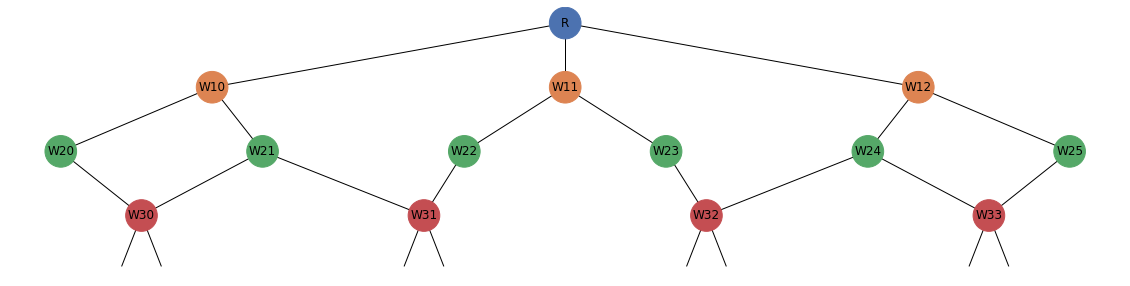

In [17]:
plt.figure(figsize=(20, 5))
nxwrapper.draw_tree(tree_levels[0][0], plt.subplot(111), colormap=seaborn.color_palette("deep"))